In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch as pt
import torch.nn as nn
import torch.nn.functional as f
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
full_df =pd.read_csv('../data/abalone.csv')

full_df["Type"] = full_df["Type"].replace(('I', 'M', 'F'), (0, 1, 2))

inputs = full_df.drop("Type", axis=1).values
answers = full_df["Type"].values

X_train, X_test, y_train, y_test = train_test_split(inputs, answers, test_size=0.2, random_state=69)
X_train = pt.FloatTensor(X_train)
X_test = pt.FloatTensor(X_test)

Y_train = pt.LongTensor(y_train)
Y_test = pt.LongTensor(y_test)


In [41]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 64)
        self.out = nn.Linear(64, 3)
    
    def forward(self, x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.out(x)
        return x

In [42]:
model = model()
criterion= nn.CrossEntropyLoss()
optimizer = pt.optim.SGD(model.parameters(), lr=0.001) 

In [ ]:
iterations = 1000
losses = []
for i in range(iterations):
    Y_pred = model.forward(X_train)
    loss = criterion(Y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.detach().numpy())
    if i % 10 == 0:
        print(f"Epoch: {i} Loss: {loss}")

Text(0.5, 1.0, 'Loss vs Epoch')

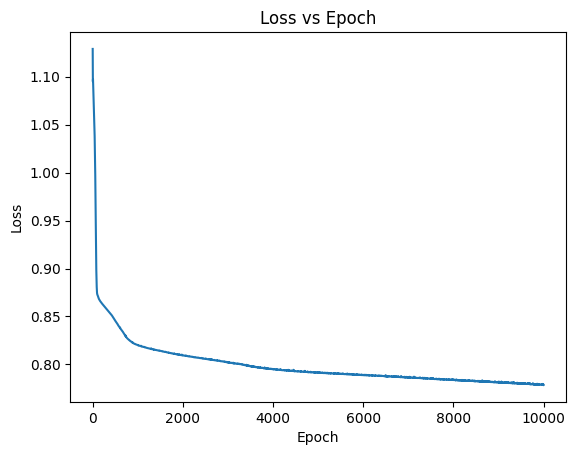

In [39]:
plt.plot(range(iterations), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")

In [ ]:
count = 0
with pt.no_grad():
    for i, data in enumerate(X_test):
        y_val = model(data)
        print(f"Prediction: {pt.argmax(y_val).item()} Answer: {Y_test[i]}")
        if pt.argmax(y_val).item() == Y_test[i]:
            count += 1
    print(f"Accuracy: {count/len(Y_test)}")
